In [32]:
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import plot_precision_recall_curve
from sklearn.metrics import average_precision_score
import matplotlib.pyplot as plt
from sklearn import svm, datasets
from sklearn.model_selection import train_test_split
import numpy as np
import pathlib 
import pandas as pd

In [33]:
path = pathlib.Path.home().joinpath('Documents', 'ms_thesis_ppi')
graph_file = pathlib.Path.cwd().joinpath('graphs')
pred_file = 'siameseNet_contrastive_96_0.7'
pred_path = pathlib.Path.joinpath(path, 'one_shot_demo', 'predictions', pred_file + '.csv')

In [34]:
df = pd.read_csv(pred_path)
"""
target = list(df['target'])
pred = list(df['predicted'])
dist = list(df['distance'])
average_precision = average_precision_score(target, pred)
"""
df

,int_A,int_B,target,distance,predicted
0,Q5SYE7,O41932,1.0,2.486899,0.0
1,P53667,Q02297,1.0,0.007250,1.0
2,Q9NPI5,Q9Y561,1.0,0.000115,1.0
3,Q9GZU2,P88997,1.0,0.341108,1.0
4,Q9Y678,Q9P299,1.0,0.051283,1.0
...,...,...,...,...,...
1206,P35247,Q8IZH2,0.0,0.629653,1.0
1207,P07196,Q9NWR8,0.0,0.093671,1.0
1208,P43026,O14513,0.0,0.402870,1.0
1209,Q96HD9,Q9Y5L0,0.0,0.222489,1.0


In [35]:
sortdf = df.sort_values(by=['distance'])
print(sortdf)
target = list(sortdf['target'])
pred = list(sortdf['predicted'])
dist = list(sortdf['distance'])
cumsum = np.cumsum(target)
rank = np.arange(len(cumsum)) + 1
Num = cumsum[-1]
prec = cumsum / rank
rec = cumsum / Num
print(prec)
print(rec)

       int_A   int_B  target  distance  predicted
420   Q96PM5  Q53HI1     0.0  0.000001        1.0
746   P40692  Q9Y678     0.0  0.000002        1.0
140   P43026  Q9H8L6     0.0  0.000004        1.0
568   Q12805  Q5NH75     0.0  0.000010        1.0
1000  Q8D0R5  P0CK53     0.0  0.000024        1.0
...      ...     ...     ...       ...        ...
651   Q6UY14  P11717     0.0  5.081157        0.0
1139  P48740  Q8TF72     0.0  5.394176        0.0
920   Q15427  Q9YP87     0.0  5.908432        0.0
463   Q6ZQS4  O75144     0.0  5.974430        0.0
359   Q15427  Q8D0Z3     0.0  6.090828        0.0

[1211 rows x 5 columns]
[0.         0.         0.         ... 0.09181141 0.09173554 0.09165979]
[0. 0. 0. ... 1. 1. 1.]


In [36]:
mrec = np.concatenate(([0.], rec, [1.]))
mpre = np.concatenate(([0.], prec, [0.]))
print(prec)

[0.         0.         0.         ... 0.09181141 0.09173554 0.09165979]


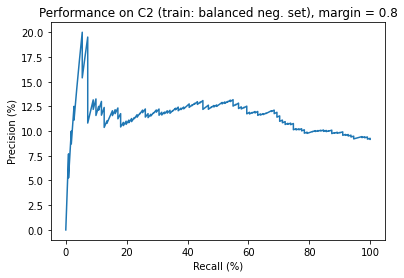

In [39]:
p_rec = [i * 100 for i in rec]
p_prec = [i * 100 for i in prec]
plt.plot(p_rec, p_prec)
plt.xlabel('Recall (%)')
plt.ylabel('Precision (%)')
plt.title('Performance on C2 (train: balanced neg. set), margin = 0.8')
sav_img = pathlib.Path.joinpath(graph_file, pred_file + '.jpg')
plt.savefig(sav_img)
plt.show()

In [38]:
y_score = []
for i in range(len(target)):
    y_score.append(1)
y_test = target    
average_precision = average_precision_score(y_test, y_score)
print(average_precision)

0.0916597853014038


[[499 601]
 [ 44  67]]


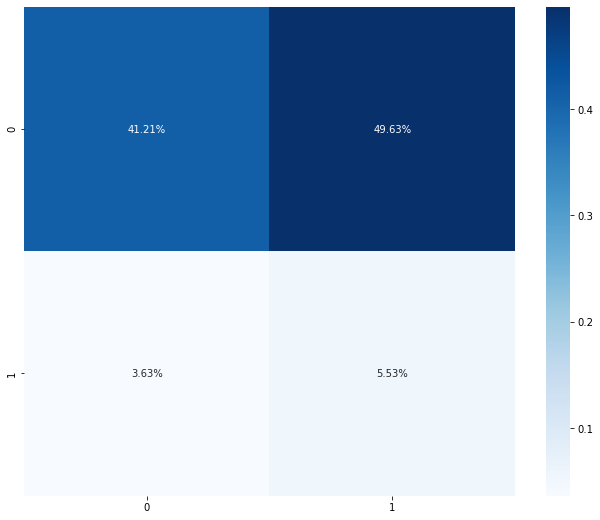

In [7]:
from sklearn.metrics import confusion_matrix
import seaborn as sb
cf_matrix = confusion_matrix(target, pred)
print(cf_matrix)
fig, ax = plt.subplots(figsize=(11, 9))
sb.heatmap(cf_matrix/np.sum(cf_matrix), annot=True, 
            fmt='.2%', cmap='Blues')
plt.show()

In [6]:
# create top 10 hit 
all_pos = df['target'] == 1
top_10 = df[all_pos].sort_values(by=['distance'], ascending=True).head(30)
top_10

,int_A,int_B,target,distance,predicted
109,Q13685,Q8D016,1.0,0.000150,1.0
73,Q86YF9,Q9NQZ3,1.0,0.000216,1.0
56,O14733,O43318,1.0,0.000350,1.0
9,Q9H944,Q9BUE0,1.0,0.000703,1.0
90,Q00653,O00221,1.0,0.001413,1.0
104,Q81UZ6,P63241,1.0,0.003748,1.0
95,Q9NY74,O41931,1.0,0.004121,1.0
2,O60763,Q8ZIX0,1.0,0.007552,1.0
34,P54257,Q8N157,1.0,0.008763,1.0
39,Q81WT3,Q99542,1.0,0.011340,1.0


       int_A   int_B  target   distance  predicted
0     Q9BQ52  O95182     1.0   0.965417        0.0
1     P22307  P69976     1.0   0.111261        1.0
2     O60763  Q8ZIX0     1.0   0.007552        1.0
3     P23434  Q13287     1.0   0.012364        1.0
4     Q14978  P38432     1.0   0.075690        1.0
...      ...     ...     ...        ...        ...
1206  Q99689  Q8WVB3     0.0   8.642038        0.0
1207  Q8NG31  Q99933     0.0   0.847406        0.0
1208  Q16394  P16219     0.0   0.031986        1.0
1209  Q9BUZ4  Q969Y2     0.0  11.056144        0.0
1210  A5PLN9  O41957     0.0   7.033360        0.0

[1211 rows x 5 columns]
[   1    2    3 ... 1209 1210 1211]


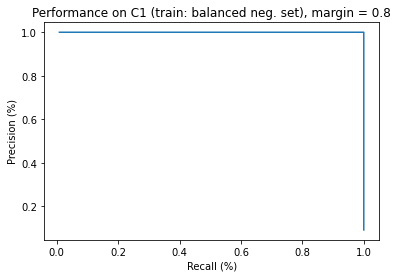

In [20]:
pos_pred = df
#pos_only = df[pos_pred].head(100)

sortdf_p = pos_pred
print(sortdf_p)
#pos_only.drop(pos_only.index[20:30])
#sortdf_p = pos_only.sort_values(by=['distance'])
target_p = list(sortdf_p['target'])
pred_p = list(sortdf_p['predicted'])
dist_p = list(sortdf_p['distance'])
cumsum_p = np.cumsum(target_p)
rank_p = np.arange(len(cumsum_p)) + 1
print(rank_p)
Num_p = cumsum_p[-1]
prec_p = cumsum_p / rank_p
rec_p = cumsum_p / Num_p

#print(prec_p)
#print(rec_p)
#p_rec_p = [i * 100 for i in rec_p]
#p_prec_p = [i * 100 for i in prec_p]
plt.plot(rec_p, prec_p)
plt.xlabel('Recall (%)')
plt.ylabel('Precision (%)')
plt.title('Performance on C1 (train: balanced neg. set), margin = 0.8')
sav_img = pathlib.Path.joinpath(graph_file, pred_file + '.jpg')
plt.savefig(sav_img)
plt.show()

In [29]:
pos_dist = []
pre
for i in range(len(pred)):
    if pred[i] == 1:
        pos_dist.append(dist[i])
print(len(pos_dist))
no_skill = len(pos_dist) / len(dist)
precision, recall, threshold = precision_recall_curve(target, pred)
#lr_auc = f1_score(target, pred), auc(lr_recall, lr_precision)
# calculate the no skill line as the proportion of the positive class
# plot the no skill precision-recall curve
plt.plot([0, 1], [no_skill, no_skill], linestyle='--', label='No Skill')
# plot the model precision-recall curve
plt.plot(recall, precision, marker='.', label='m=0.8')
# axis labels
plt.xlabel('Recall')
plt.ylabel('Precision')
# show the legend
plt.legend()
# show the plot
plt.show()

840


ValueError: Found input variables with inconsistent numbers of samples: [1211, 121100]

In [28]:
print(len(pred))

1211


In [2]:
iris = datasets.load_iris()
X = iris.data
y = iris.target

# Add noisy features
random_state = np.random.RandomState(0)
n_samples, n_features = X.shape
X = np.c_[X, random_state.randn(n_samples, 200 * n_features)]

# Limit to the two first classes, and split into training and test
X_train, X_test, y_train, y_test = train_test_split(X[y < 2], y[y < 2],
                                                    test_size=.5,
                                                    random_state=random_state)

# Create a simple classifier
classifier = svm.LinearSVC(random_state=random_state)
classifier.fit(X_train, y_train)
y_score = classifier.decision_function(X_test)

In [3]:
average_precision = average_precision_score(y_test, y_score)

print('Average precision-recall score: {0:0.2f}'.format(
      average_precision))

Average precision-recall score: 0.88


Text(0.5, 1.0, '2-class Precision-Recall curve: AP=0.88')

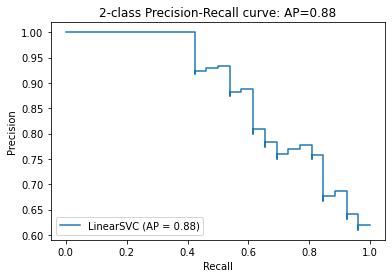

In [4]:
disp = plot_precision_recall_curve(classifier, X_test, y_test)
disp.ax_.set_title('2-class Precision-Recall curve: '
                   'AP={0:0.2f}'.format(average_precision))

In [11]:
import numpy as np
x = np.array([[[1,2,3,4,5],
               [5,6,7,8,5],
               [5,6,7,8,5]],
              [[11,22,23,24,5],
               [25,26,27,28,5],
               [5,6,7,8,5]]])
i,j,k = x.shape
y = np.array([[[31,32,33,34,5],
               [35,36,37,38,5],
               [5,6,7,8,5]],
              [[41,42,43,44,5],
               [45,46,47,48,5],
               [5,6,7,8,5]]])


yy = y.reshape(i,j*k).T

xx = x.reshape(i,j*k).T
e = xx-yy
X = np.vstack([xx,yy])
V = np.cov(X.T) 
p = np.linalg.inv(V)
D = np.sqrt(np.sum(np.dot(e,p) * e, axis = 1))
print(D)

[2.28765854 2.75165028 2.75165028 2.75165028 0.         2.75165028
 2.75165028 2.75165028 2.75165028 0.         0.         0.
 0.         0.         0.        ]
